# Random Walk on Erdos-Renyi networks

# Question 1.a
 Create an undirected random network with 1000 nodes, and the probability p for drawing an edge between any pair of nodes equal to 0.01.

In [1]:
library('igraph')
library('Matrix')
library('pracma')



Attaching package: 'igraph'


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union



Attaching package: 'pracma'


The following objects are masked from 'package:Matrix':

    expm, lu, tril, triu




In [2]:
g=erdos.renyi.game(n=1000,p.or.m=0.01,type='gnp',directed=F)

# Question 1.b
Let a random walker start from a randomly selected node (no teleportation). We use t to denote the number of steps that the walker has taken. Measure the average distance (deﬁned as the shortest path length) hs(t)i of the walker from his starting point at step t. Also, measure the variance σ2(t) = h(s(t)−hs(t)i)2i of this distance. Plot hs(t)i v.s. t and σ2(t) v.s. t. Here, the average h·i is over random choices of the starting nodes. 

In [3]:
#define 100 different randomly chosen starting nodes
start_node=sample(1:1000,100)
#define maximum step length as 1000 since there are only 1000 nodes in the graph
step_max=200
#define empty list to contain all visited node and end point
path_list=vector(mode="list",length=length(start_node))
end_list=vector(mode="list",length=length(start_node))
for (i in 1:length(start_node)){
    path=random_walk(g,start=start_node[i],steps=step_max,stuck=c('return'))
    path_list[[i]]=path
    end_list[[i]]=path[length(path)]
}

In [4]:
#measurement
#define shortest path list and variance list
shortest_path_list_ave=vector(mode='numeric',length=step_max)#200 elements
variance_list=vector(mode='numeric',length=step_max)#200 elements
for (i in 1:step_max){
    shortest_path_sum=0
    shortest_path_list=vector(mode='list',length=length(start_node))
    for (j in 1:length(start_node)){
        #obtain shortest path from start node j to each end node
        shortest_path=shortest_paths(g,to=start_node[j],from=path_list[[j]][i],output=c('vpath'))
        shortest_path_sum=shortest_path_sum+length(shortest_path[[1]][[1]])-1
        shortest_path_list[[j]]=shortest_path[[1]][[1]]
    }
    #take average over 100 times walk
    shortest_path_list_ave[i]=shortest_path_sum/length(start_node)
    for (k in 1:length(start_node)){
        variance_list[i]=variance_list[i]+(length(shortest_path_list[[k]])-shortest_path_list_ave[i])**2
        
    }
    variance_list[i]=variance_list[i]/length(start_node)
}


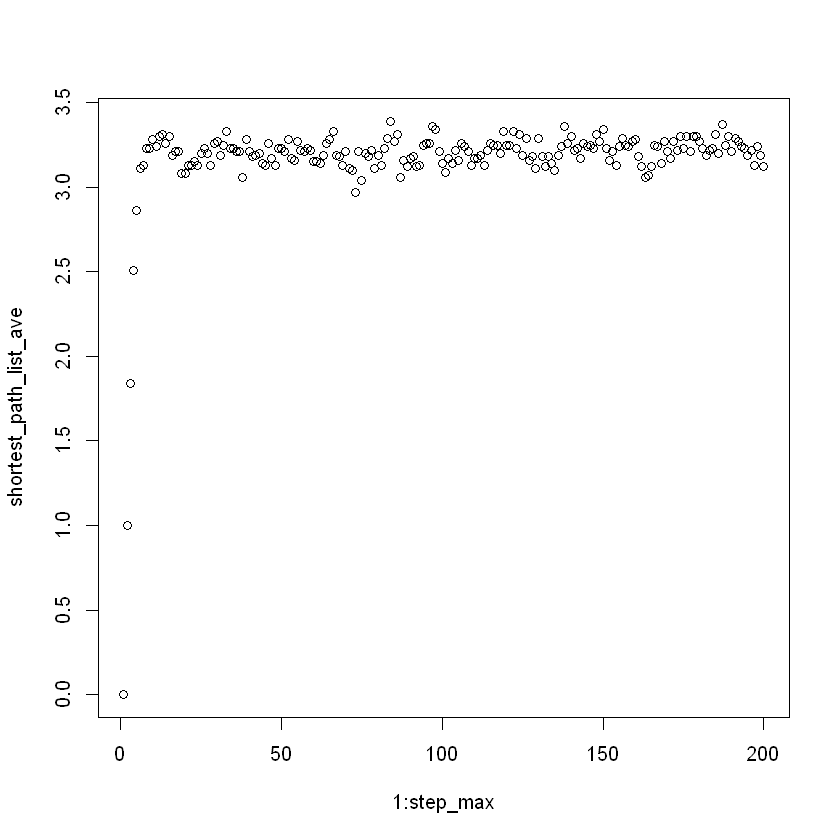

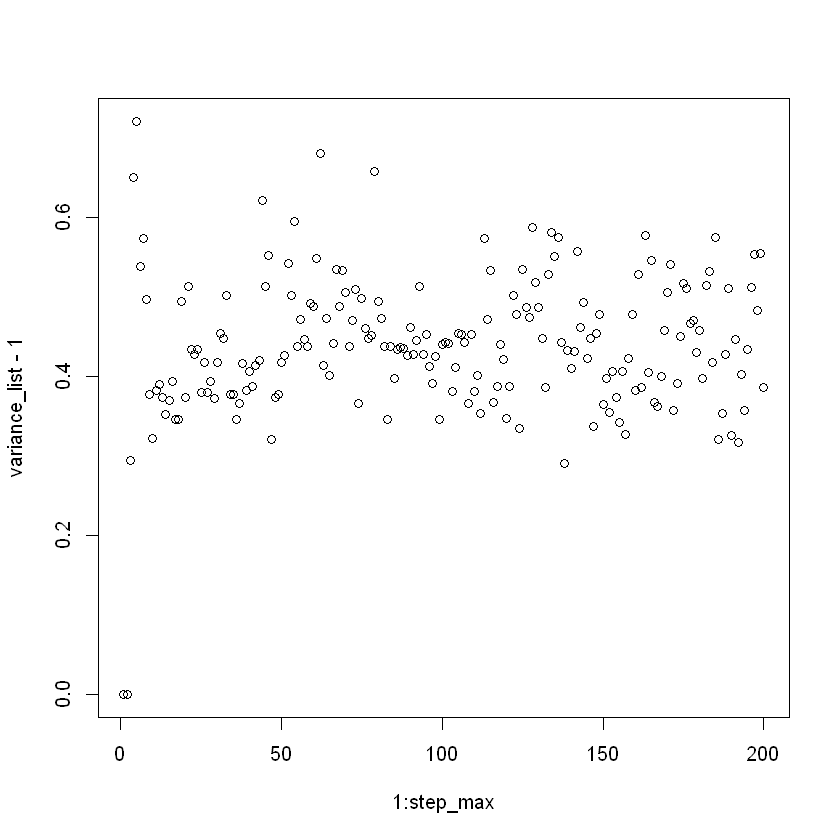

In [5]:
#plot shortest_path_average and variance
plot(1:step_max,shortest_path_list_ave,type='p')
plot(1:step_max,variance_list-1,type='p')

# Question 1.c
Measure the degree distribution of the nodes reached at the end of the random walk. How does it compare to the degree distribution of graph? 

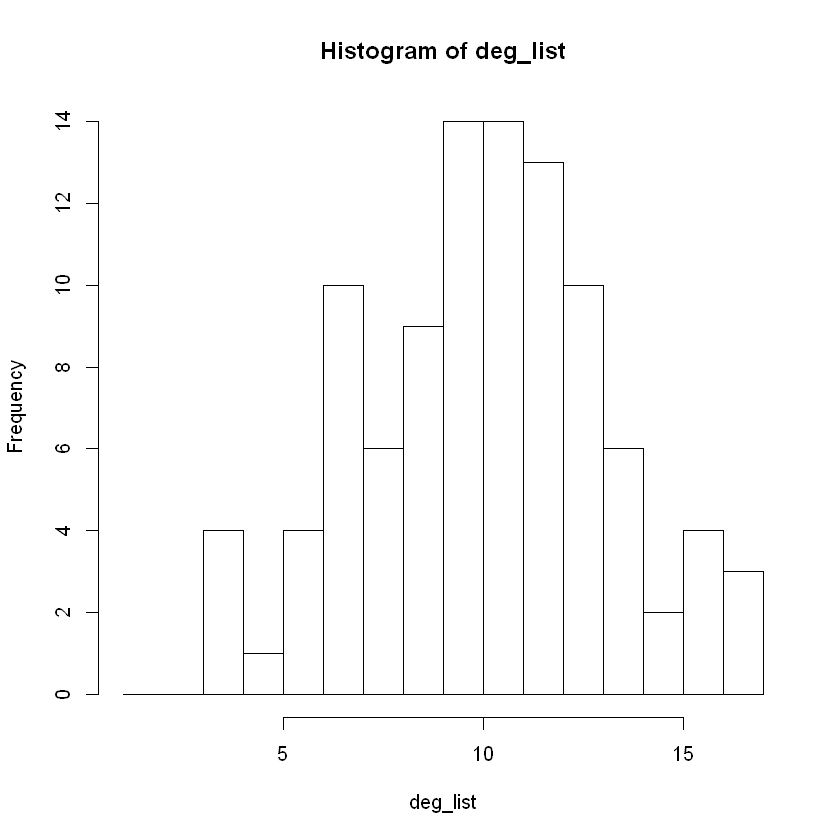

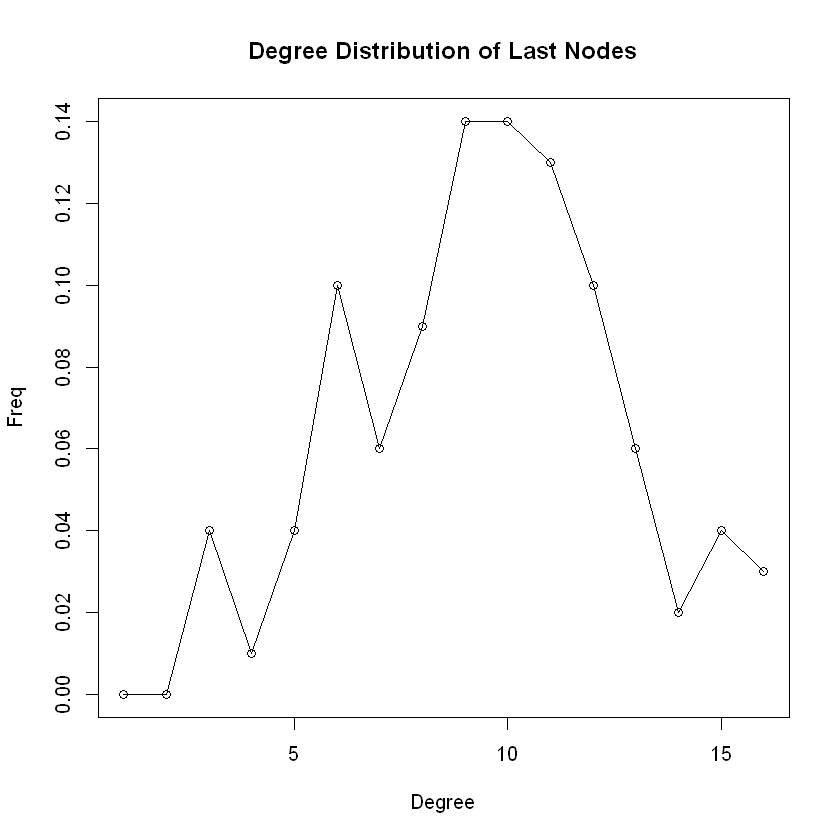

In [10]:
#1000 steps, 100 walks, the statistical data is obtained from 100 trials
deg_list=degree(g,end_list)
#plot histogram of the degree distribution of end node
h=hist(deg_list,breaks=1:max(deg_list))
dd=h$density
plot(seq(2:max(deg_list)),dd,main="Degree Distribution of Last Nodes",xlab="Degree",ylab="Freq")
lines(seq(2:max(deg_list)),dd)

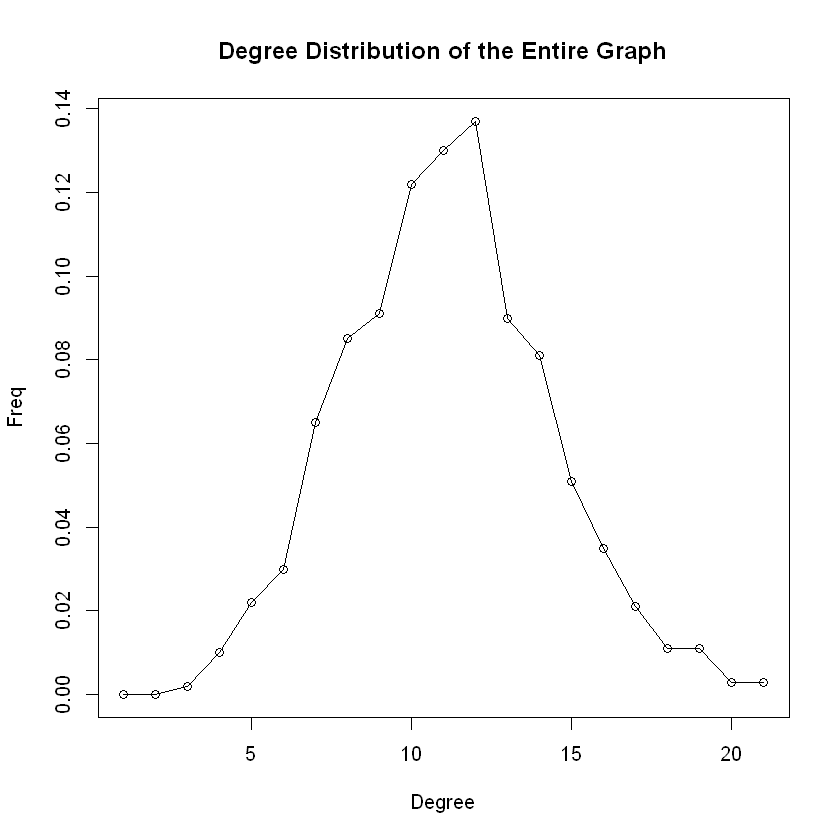

In [11]:
#plot degree distribution of the entire graph
plot(degree_distribution(g),main="Degree Distribution of the Entire Graph",xlab="Degree",ylab="Freq")
lines(degree_distribution(g))

# Question 1.d
 Repeat 1(b) for undirected random networks with 10000 nodes. Compare the results and explain qualitatively. Does the diameter of the network play a role?


In [17]:
g2=erdos.renyi.game(10000,p=0.01,type="gnp",directed=F)

#define 100 different randomly chosen starting nodes
start_node=sample(1:10000,100)
#define maximum step length as 1000 since there are only 1000 nodes in the graph
step_max=200
#define empty list to contain all visited node and end point
path_list=vector(mode="list",length=length(start_node))
end_list=vector(mode="list",length=length(start_node))
for (i in 1:length(start_node)){
    path=random_walk(g2,start=start_node[i],steps=step_max,stuck=c('return'))
    path_list[[i]]=path
    end_list[[i]]=path[length(path)]
}

#measurement
#define shortest path list and variance list
shortest_path_list_ave=vector(mode='numeric',length=step_max)
variance_list=vector(mode='numeric',length=step_max)

for (i in 1:step_max){
    shortest_path_sum=0
    shortest_path_list=vector(mode='list',length=length(start_node))
    for (j in 1:length(start_node)){
        #obtain shortest path from start node j to each end node
        shortest_path=shortest_paths(g2,from=start_node[j],to=path_list[[j]][i],output=c('vpath'))
        shortest_path_sum=shortest_path_sum+length(shortest_path[[1]][[1]])-1
        shortest_path_list[[j]]=shortest_path[[1]][[1]]
    }
    #take average over 100 times walk
    shortest_path_list_ave[i]=shortest_path_sum/length(start_node)
    for (k in 1:length(start_node)){
        variance_list[i]=variance_list[i]+(length(shortest_path_list[[k]])-shortest_path_list_ave[i])**2
        
    }
    variance_list[i]=variance_list[i]/length(start_node)
}


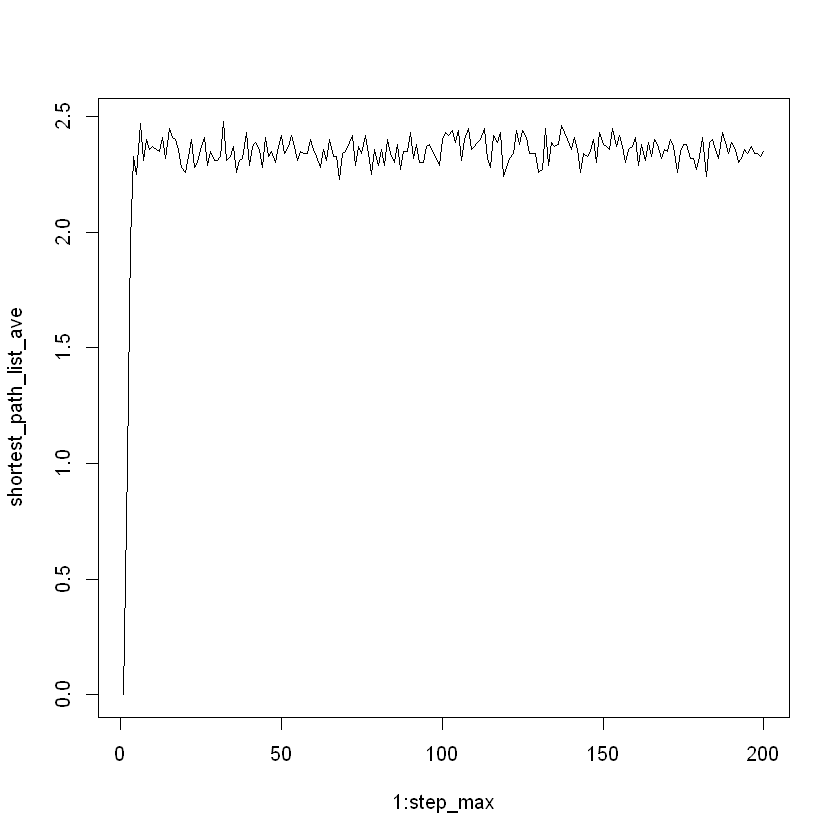

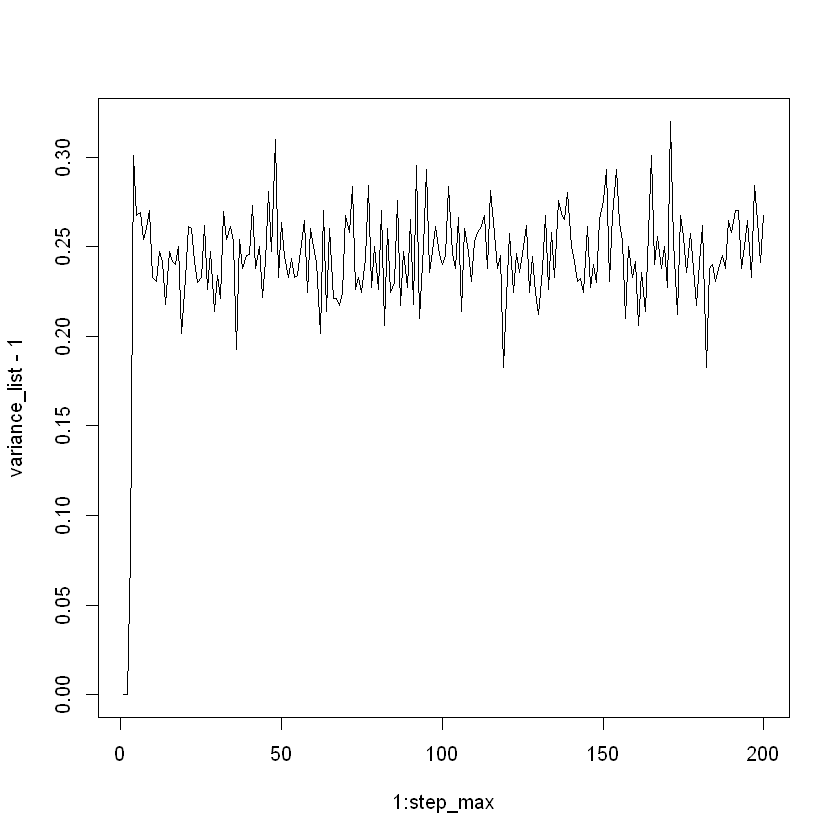

In [18]:
#plot shortest_path_average and variance
plot(1:step_max,shortest_path_list_ave,type='l')
plot(1:step_max,variance_list-1,type='l')

In [20]:
#diameter comparsion
cat("The diameter of 1000-node graph is ",diameter(g))
cat("The diameter of 10000-node graph is ",diameter(g2))

The diameter of 1000-node graph is  5The diameter of 10000-node graph is  3